In [15]:
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

[ 2.5         2.21352549  1.46352549  0.53647451 -0.21352549 -0.5
  0.1         0.7         1.3         1.9         2.5       ] [3.5        2.61832212 2.07341523 2.07341523 2.61832212 3.5
 3.5        3.5        3.5        3.5        3.5       ]


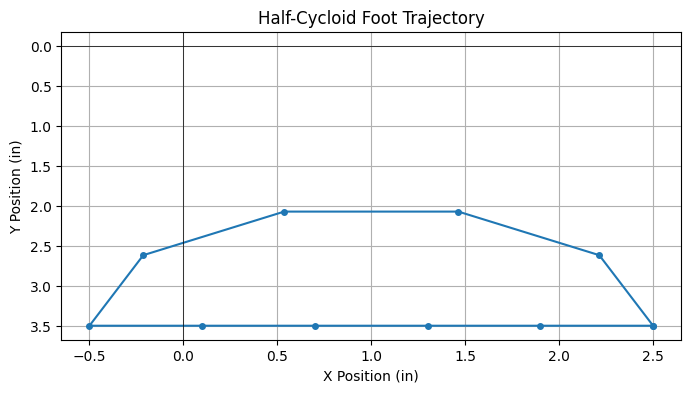

In [16]:
def generate_half_cycloid_trajectory(x_s, step_length, step_height,step_offset, num_points=6):
    """
    Generates the points for half of the cycloid trajectory of the foot for the swing phase.
    
    Parameters:
    - x_s: Starting x coordinate of the foot-end.
    - step_length: The distance between the starting and landing points.
    - step_height: The maximum height of the foot-end from the ground.
    - num_points: Number of points to generate for the trajectory.
    
    Returns:
    - x, y: The coordinates of the foot-end points in the half-cycloid trajectory.
    """
    t = np.linspace(np.pi, 0, num_points)  # Only go from 0 to pi for half the cycloid
    x = x_s + (step_length / 2) * (1 - np.cos(t))
    y = step_height * (1 - np.sin(t))
    
    y = np.append(y, np.linspace(y[-1],y[0],int(num_points/2 +3))[1:])
    x = np.append(x, np.linspace(x[-1],x[0],int(num_points/2 +3))[1:]) -x[-1]
    return x, -(-(y+step_offset)+step_height)

def generate_up_and_down(step_height, step_offset, num_points=6):
    """
    Generates the points for half of the cycloid trajectory of the foot for the swing phase.
    
    Parameters:
    - x_s: Starting x coordinate of the foot-end.
    - step_length: The distance between the starting and landing points.
    - step_height: The maximum height of the foot-end from the ground.
    - num_points: Number of points to generate for the trajectory.
    
    Returns:
    - x, y: The coordinates of the foot-end points in the half-cycloid trajectory.
    """
    y = np.linspace(step_height+step_offset,step_height, num_points)  # Only go from 0 to pi for half the cycloid
    x = np.ones(num_points)
    return x, y

# Parameters for the half-cycloid trajectory
step_length = 3  # Step size in inches
x_s = -step_length / 2# We start at negative half the step length to center the curve around zero
step_height = 1.75  # Step height in inches
step_offset = 3.5

# Generate the trajectory points
x_cycloid, y_cycloid = generate_half_cycloid_trajectory(x_s, step_length, step_height,step_offset)
x_cycloid = x_cycloid -.5
print(x_cycloid, y_cycloid)
# Plotting the half-cycloid trajectory
plt.figure(figsize=(8, 4))
plt.plot(x_cycloid, y_cycloid, '-o', markersize=4)
plt.title('Half-Cycloid Foot Trajectory')
plt.xlabel('X Position (in)')
plt.ylabel('Y Position (in)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().invert_yaxis()
plt.show()

[1. 1. 1. 1. 1. 1.] [4.5 4.  3.5 3.  2.5 2. ]


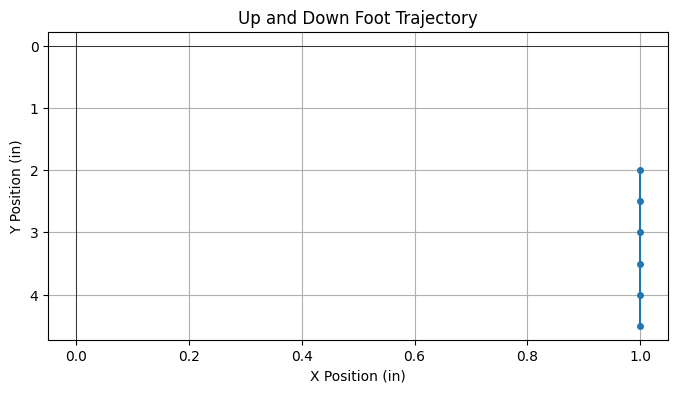

In [17]:
# Parameters for the half-cycloid trajectory
step_length = 3  # Step size in inches
x_s = -step_length / 2# We start at negative half the step length to center the curve around zero
step_height = 2  # Step height in inches
step_offset = 2.5

# Generate the trajectory points
x, y = generate_up_and_down(step_height,step_offset)
print(x, y)
# Plotting the half-cycloid trajectory
plt.figure(figsize=(8, 4))
plt.plot(x, y, '-o', markersize=4)
plt.title('Up and Down Foot Trajectory')
plt.xlabel('X Position (in)')
plt.ylabel('Y Position (in)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().invert_yaxis()
plt.show()

In [18]:
#Second Research Paper
l, l1, l2 = 1.93, .869, 3.119 #in


def inverse_kinematics(x, y, z=0):
    # Calculating distances AC and EC using the given positions of the foot-end point C (x, y)
    l_AC = np.sqrt(x**2 + y**2)
    l_EC = np.sqrt((x - l)**2 + y**2)

    # Using cosine law to find the angles, with inputs clipped to [-1, 1]
    cos_CAE = np.clip((l_AC**2 + l**2 - l_EC**2) / (2 * l * l_AC), -1, 1)
    cos_CEA = np.clip((l_EC**2 + l**2 - l_AC**2) / (2 * l * l_EC), -1, 1)
    cos_BAC = np.clip((l1**2 + l_AC**2 - l2**2) / (2 * l1 * l_AC), -1, 1)
    cos_CED = np.clip((l1**2 + l_EC**2 - l2**2) / (2 * l1 * l_EC), -1, 1)

    # Calculating the angles using np.arccos with clipped inputs
    angle_CAE = np.arccos(cos_CAE)
    angle_CEA = np.arccos(cos_CEA)
    angle_BAC = np.arccos(cos_BAC)
    angle_CED = np.arccos(cos_CED)

    # Calculating theta1 and theta2
    theta1 = np.rad2deg(angle_CAE + angle_BAC)
    theta2 = np.rad2deg(np.pi - angle_CEA - angle_CED)
    
    theta3 = np.rad2deg(np.arccos(z/np.sqrt(z**2 + y**2)))

    return theta1, theta2, theta3
    

# for Px,Py in zip(x_cycloid, y_cycloid):
#     # Calculate joint angles
#     theta1, theta2 = inverse_kinematics(Px, Py)

#     # Print the results
#     print(f"Theta1: degrees {round(theta1,2)} Theta2: {round(theta2,2)} degrees")
    
#Forward Kinematics:
def equations(p, l, l1, l2, theta1, theta2):
    theta3, theta4 = p
    eq1 = l2 * np.cos(theta3) - l2 * np.cos(theta4) - (l1 * np.cos(theta1) - l1 * np.cos(theta2) - l)
    eq2 = l2 * np.sin(theta3) - l2 * np.sin(theta4) - (l1 * np.sin(theta1) - l1 * np.sin(theta2))
    return (eq1, eq2)

def Forward_Kinematics(theta1, theta2):
    solution = fsolve(equations, (0,0), args=(l, l1, l2, theta1, theta2))
    theta3_sol, theta4_sol = solution
    theta3 = theta3_sol % 2*np.pi
    theta4 = theta4_sol % 2*np.pi

    x = l + l1 * np.cos(theta2) + l2 * np.cos(theta3)
    y = l1 * np.sin(theta2) + l2 * np.sin(theta3)
    
    print(f"Theta3: degrees {round(np.rad2deg(theta3),2)} Theta4: {round(np.rad2deg(theta4),2)} degrees")
    
    return [x,y]

def Forward_Kinematics2(theta1, theta2):
    angle_cos = np.clip((l1**2 + l2**2 - l**2) / (2 * l1 * l2), -1, 1)
    x = l + l1 * np.cos(theta2) + l2 * np.cos(np.arccos(angle_cos))
    y = l1 * np.sin(theta2) + l2 * np.sin(np.arccos(angle_cos))
    
    return [x,y]

#print(Forward_Kinematics(np.deg2rad(257.23), np.deg2rad(-29.93)))
#print(Forward_Kinematics2(np.deg2rad(257.23), np.deg2rad(-29.93)))

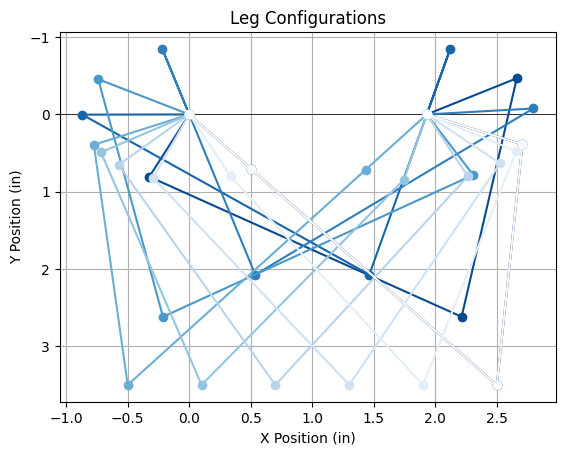

In [22]:
def plot_leg_configurations(l, l1, l2, x_cycloid, y_cycloid):
    # Prepare plot
    fig, ax = plt.subplots()
    ax.set_title('Leg Configurations')
    ax.set_xlabel('X Position (in)')
    ax.set_ylabel('Y Position (in)')
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)

    # Generate colors
    colors = [plt.cm.Blues(i) for i in np.linspace(1, 0, len(x_cycloid))]

    for i, (Px, Py) in enumerate(zip(x_cycloid, y_cycloid)):
        theta1, theta2, theta3 = inverse_kinematics(Px, Py)
        #theta1,theta2 = 90,45
        #print(f"Theta1: degrees {round(theta1,2)} Theta2: {round(theta2,2)} degrees")
        # Calculate the positions of the joints
        joint_A = np.array([0, 0])  # Servo position
        joint_B = joint_A + np.array([l1 * np.cos(np.deg2rad(theta1)), l1 * np.sin(np.deg2rad(theta1))])
        joint_E = np.array([l, 0])  # The other servo position
        joint_D = joint_E + np.array([l1 * np.cos(np.deg2rad(theta2)), l1 * np.sin(np.deg2rad(theta2))])
        foot_C = np.array([Px,Py])
        
        #Plot the leg configuration
        ax.plot([joint_A[0], joint_B[0], foot_C[0], joint_D[0], joint_E[0]],
               [joint_A[1], joint_B[1], foot_C[1], joint_D[1], joint_E[1]],
               'o-', color=colors[i], label=f"Theta1: degrees {round(theta1,2)} Theta2: {round(theta2,2)} degrees")
        magnitude_CD = np.linalg.norm(joint_D - foot_C)
        magnitude_BC = np.linalg.norm(joint_B - foot_C)
        #print(f"BC: {magnitude_BC} and CD: {magnitude_CD}")
        #break

    # Show plot
    plt.gca().invert_yaxis()
    plt.show()

# Call the plotting function with the provided leg parameters and test points

plot_leg_configurations(l, l1, l2, x_cycloid, y_cycloid) 
#plot_leg_configurations(l, l1, l2, [1], [1])

Theta1: 121.52 degrees Theta2: 56.03 degrees Theta3: 54.46 degrees
Theta1: 172.36 degrees Theta2: 4.52 degrees Theta3: 49.79 degrees
Theta1: 220.93 degrees Theta2: -50.52 degrees Theta3: 54.78 degrees
Theta1: 220.93 degrees Theta2: -50.52 degrees Theta3: 75.49 degrees
Theta1: 172.36 degrees Theta2: 4.52 degrees Theta3: 94.66 degrees
Theta1: 121.52 degrees Theta2: 56.03 degrees Theta3: 98.13 degrees
Theta1: 121.52 degrees Theta2: 56.03 degrees Theta3: 88.36 degrees
Theta1: 121.52 degrees Theta2: 56.03 degrees Theta3: 78.69 degrees
Theta1: 121.52 degrees Theta2: 56.03 degrees Theta3: 69.62 degrees
Theta1: 121.52 degrees Theta2: 56.03 degrees Theta3: 61.5 degrees
Theta1: 121.52 degrees Theta2: 56.03 degrees Theta3: 54.46 degrees


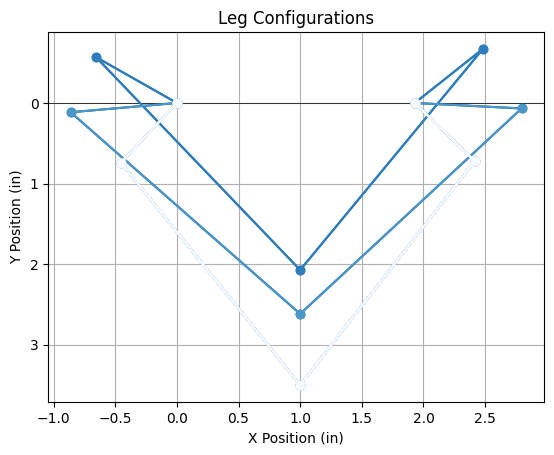

In [23]:
x = np.ones(len(x_cycloid))
y = y_cycloid
z = x_cycloid

for Px,Py,Pz in zip(x, y, z):
    theta1, theta2, theta3 = inverse_kinematics(Px, Py, Pz)
    #theta1,theta2 = 90,45
    print(f"Theta1: {round(theta1,2)} degrees Theta2: {round(theta2,2)} degrees Theta3: {round(theta3,2)} degrees")
    
plot_leg_configurations(l, l1, l2, x, y)